In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [4]:
# importa o dataset
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normaliza os dados
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten
y_train, y_test = y_train.flatten(), y_test.flatten()

# numero de classes
K = len(set(y_train))
print(f'numero de classes: {K}')

print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')

numero de classes: 10
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [5]:
# cria a rede neural por api funcional

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 77ms/step - accuracy: 0.4543 - loss: 1.7225 - val_accuracy: 0.6149 - val_loss: 1.1102
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.7043 - loss: 0.8538 - val_accuracy: 0.6754 - val_loss: 0.9435
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.7672 - loss: 0.6831 - val_accuracy: 0.7676 - val_loss: 0.6808
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.8054 - loss: 0.5633 - val_accuracy: 0.7816 - val_loss: 0.6699
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8384 - loss: 0.4728 - val_accuracy: 0.7615 - val_loss: 0.7326
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.8663 - loss: 0.3893 - val_accuracy: 0.8051 - val_loss: 0.6271
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.8900 - loss: 0.3206 - val_accuracy: 0.8032 - val_loss: 0.6413
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 

In [10]:
# fit com data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 3:38 140ms/step - accuracy: 0.8438 - loss: 0.5634

C:\Users\kaiqu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.7928 - loss: 0.6528 - val_accuracy: 0.8155 - val_loss: 0.5653
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:07 82ms/step - accuracy: 0.7812 - loss: 0.6480

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7812 - loss: 0.6480 - val_accuracy: 0.8173 - val_loss: 0.5643
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.8360 - loss: 0.4915 - val_accuracy: 0.8387 - val_loss: 0.4996
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7188 - loss: 0.7083 - val_accuracy: 0.8376 - val_loss: 0.5014
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8493 - loss: 0.4511 - val_accuracy: 0.8156 - val_loss: 0.5717
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9062 - loss: 0.2265 - val_accuracy: 0.8142 - val_loss: 0.5812
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8563 - loss: 0.4263 - val_accuracy: 0.8375 - val_loss: 0.4872
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8438 - loss: 0.4369 - val_accuracy: 0.8377 - val_loss: 0.4875
Epoch 9/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.8607 - loss: 0.4119 -

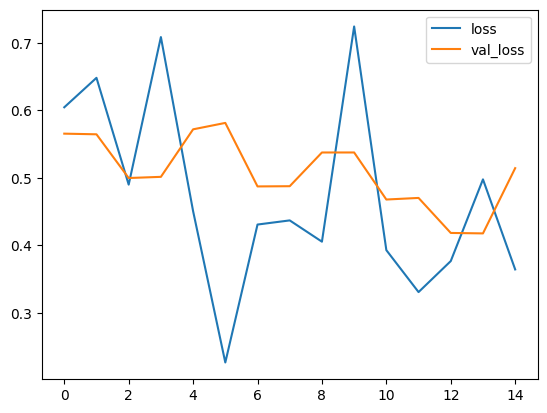

In [12]:
# plotando a perda por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

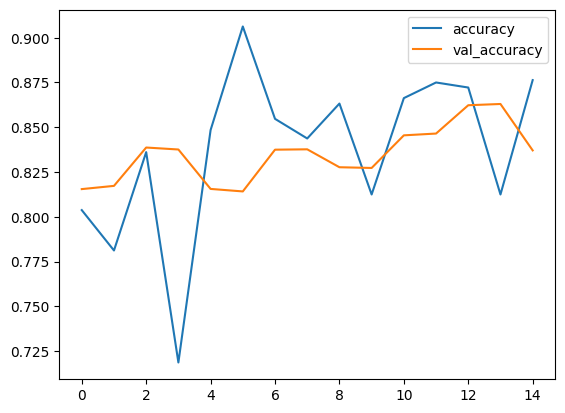

In [13]:
# plotando a precisão por iteração
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
conf matrix sem normalização
[[719  13  81  20  36   8  21   7  53  42]
 [  3 945   0   1   0   1   5   0  11  34]
 [ 18   1 833  20  25  33  59   6   4   1]
 [ 10   2  43 688  29 112  89  16   3   8]
 [  2   1  78  44 769  17  73  14   1   1]
 [  6   1  31  91  21 784  51  13   0   2]
 [  1   0  22  14   5   5 950   2   1   0]
 [  7   0  24  12  34  41  18 859   1   4]
 [ 18  13  14  11   7   2  25   1 894  15]
 [  2  39   3   5   1   2   5   2  11 930]]


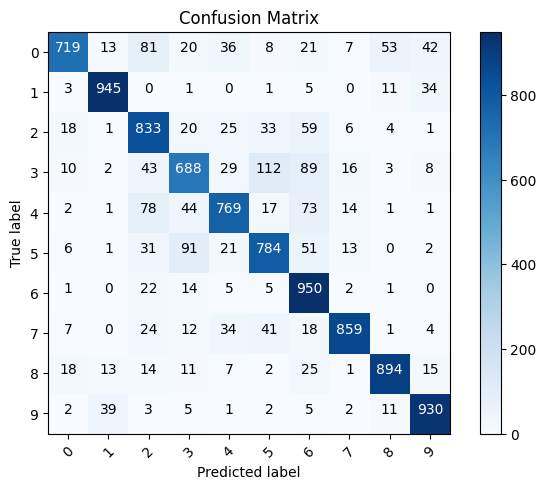

In [14]:
# pltando a matriz de confusão
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('conf matrix normalizada')
    else:
        print('conf matrix sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))